<a href="https://colab.research.google.com/github/luckyluke5/datenzentrierteinformatik/blob/main/%C3%9Cbungsblatt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aufgabe 2.1

Linear: [-75.52764704   0.85012657] 
Kubisch: [-3.01909930e+03  4.50291300e+01 -2.15973486e-01  3.41305556e-04]


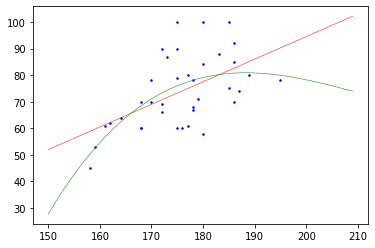

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import pandas as pd
import scipy.optimize as opt
import datetime 

name = "/content/whData.dat"
data = np.loadtxt(name, dtype=np.object, comments='#', delimiter=None)
y = data[:,0].astype(float)
x = data[:,1].astype(float)

b=y!=-1
new_x=x[b]
new_y=y[b]

matF = np.vstack((np.ones_like(new_x),new_x))
vecF = la.lstsq(matF.T, new_y, rcond=None)[0]

def f(x):
  return vecF[0]+vecF[1]*x

matG = np.vstack((np.ones_like(new_x),new_x,(new_x)**2,(new_x)**3))
vecG = la.lstsq(matG.T,new_y, rcond=None)[0]

def g(x):
  return vecG[0]+vecG[1]*x+vecG[2]*x**2+vecG[3]*x**3



v=np.array(range(150,210,1))
plt.plot(new_x,new_y, 'bo', ms=1.5)
plt.plot(v, f(v), 'r', linewidth=0.5)
plt.plot(v, g(v), 'g', linewidth=0.5)

print('Linear:',vecF,'\n''Kubisch:',vecG)

#Aufgabe 2.2

Linear: [-14.27055504   0.47874642] 
Kubisch: [-1.81026630e+04  3.04874779e+02 -1.70323134e+00  3.16898117e-03]


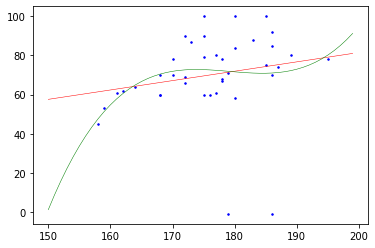

In [ ]:
matF = np.vstack((np.ones_like(x),x))
vecF = la.lstsq(matF.T, y, rcond=None)[0]

def f(x):
  return vecF[0]+vecF[1]*x

matG = np.vstack((np.ones_like(x),x,(x)**2,(x)**3))
vecG = la.lstsq(matG.T,y, rcond=None)[0]

def g(x):
  return vecG[0]+vecG[1]*x+vecG[2]*x**2+vecG[3]*x**3



v=np.array(range(150,210,1))
plt.plot(x,y, 'bo', ms=1.5)
plt.plot(v, f(v), 'r', linewidth=0.5)
plt.plot(v, g(v), 'g', linewidth=0.5)

print('Linear:',vecF,'\n''Kubisch:',vecG)

#Aufgabe 2.3

In [ ]:
csv = "/content/time_series_covid19_confirmed_global.csv"
dataset = pd.read_csv(csv)
row=dataset[dataset['Country/Region']=='Germany']
Ivalues=row.iloc[:,9:87].to_numpy()[0]


array([     1,      4,      4,      4,      5,      8,     10,     12,
           12,     12,     12,     13,     13,     14,     14,     16,
           16,     16,     16,     16,     16,     16,     16,     16,
           16,     16,     16,     16,     16,     17,     27,     46,
           48,     79,    130,    159,    196,    262,    482,    670,
          799,   1040,   1176,   1457,   1908,   2078,   3675,   4585,
         5795,   7272,   9257,  12327,  15320,  19848,  22213,  24873,
        29056,  32986,  37323,  43938,  50871,  57695,  62095,  66885,
        71808,  77872,  84794,  91159,  96092, 100123, 103374, 107663,
       113296, 118181, 122171, 124908, 127854, 130072])

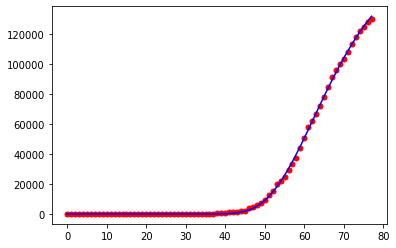

In [ ]:



def gompertzFct(x, N, r, t0):
  return N * np.exp(-np.exp(-r * (x-t0)))

t_trn = np.array(range(len(Ivalues)))


guess = (100000., .1, 50.)
parameters, covariance = opt.curve_fit(gompertzFct, t_trn, Ivalues, p0=guess)

plt.plot(t_trn, I_trn, 'or', ms=5)

I = gompertzFct(t_trn, *parameters)

plt.plot(t_trn, I, 'b', ms=1)


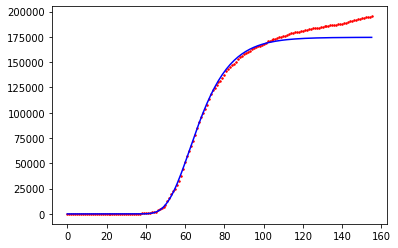

In [ ]:
Ivalues_extend = row.iloc[:,9:87+76+2].to_numpy()[0]
t_trn_extend = np.array(range(len(Ivalues_extend)))

plt.plot(t_trn_extend, Ivalues_extend, 'or', ms=1.5)

I = gompertzFct(t_trn_extend, *parameters)

plt.plot(t_trn_extend, I, 'b', ms=1)
